In [81]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as img
import cv2

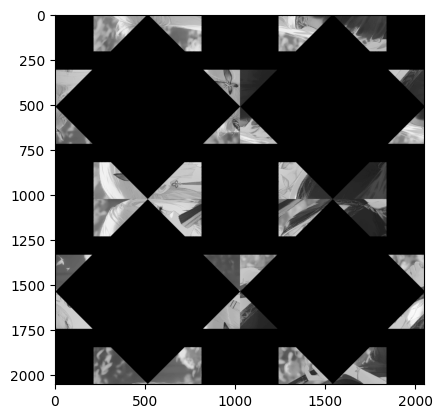

In [82]:
image = plt.imread("res/senheScramble.jpg")
plt.imshow(image, cmap='gray')

In [83]:
def rotation(image, deg=0):
    tinggi, lebar = image.shape
    rotate = np.zeros((tinggi,lebar))
    rad = deg*np.pi / 180      
    for i in range(tinggi):
        for j in range(lebar):
            x2 = int((i-tinggi/2) * np.cos(rad) - (j-lebar/2) * np.sin(rad) + tinggi/2)
            y2 = int((i-tinggi/2) * np.sin(rad) + (j-lebar/2) * np.cos(rad) + lebar/2)
            if (0 <= x2 <tinggi and 0 <= y2 < lebar):
                rotate[i,j] = image[x2,y2]
    return rotate

In [84]:
def translation(image, x=0, y=0):
    tinggi, lebar = image.shape
    result = np.zeros((tinggi, lebar))
    for i in range(tinggi):
        for j in range(lebar):
            result[i,j] = image[i-x,j-y]
                
    return result

In [85]:
def sliced(img, rows, cols):
    img_sliced = []
    num_rows = len(rows) - 1
    num_cols = len(cols) - 1
    for i in range(num_rows):
        for j in range(num_cols):
            start_row = sum(rows[1:i+1])
            end_row = sum(rows[1:i+2])
            start_col = sum(cols[1:j+1])
            end_col = sum(cols[1:j+2])
            parts = img[start_row:end_row, start_col:end_col]
            img_sliced.append(parts)
    return img_sliced

In [86]:
print("height = ", image.shape[0])
print("width = ", image.shape[1])

rows = [0, 1026, 1026] 
cols = [0, 1026, 1026]

height =  2052
width =  2052


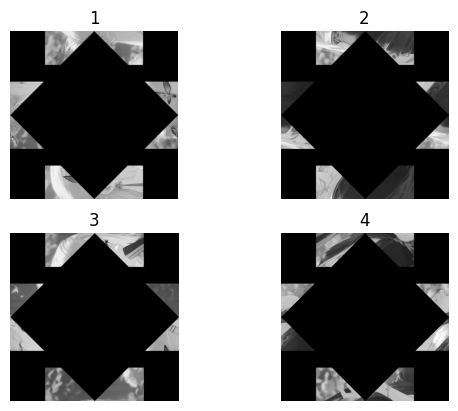

In [87]:
parts = sliced(image, rows, cols)
for i in range(len(parts)):
    plt.subplot(2, 2, i+1)
    plt.imshow(parts[i], cmap='gray')
    plt.title(i+1)
    plt.axis('off')
plt.show()

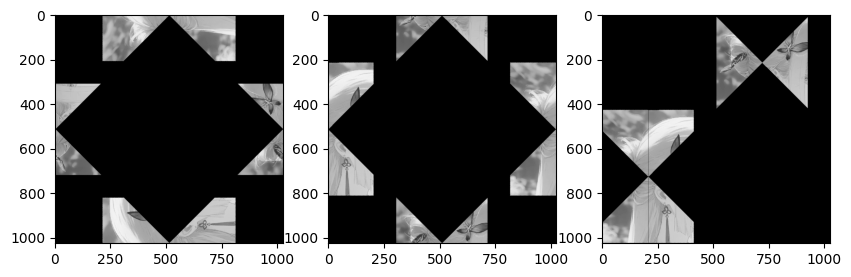

In [88]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(parts[0], cmap='gray')
plt.subplot(1, 3, 2)
hasil_rotate = rotation(parts[0], 90)
plt.imshow(hasil_rotate, cmap='gray')
plt.subplot(1, 3, 3)
hasil_trans = translation(hasil_rotate, 213, 208)
plt.imshow(hasil_trans, cmap='gray')

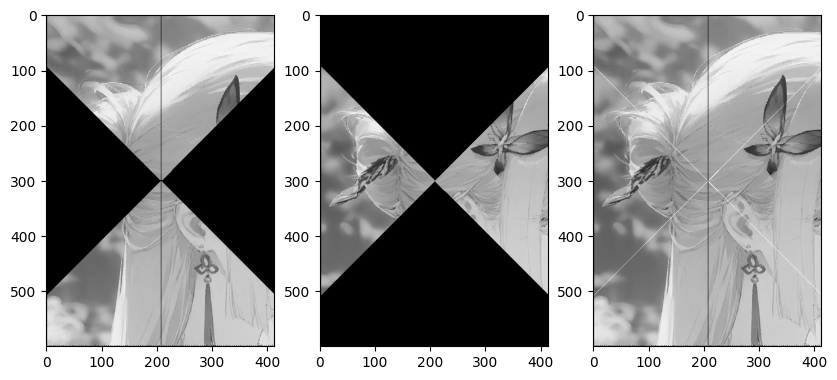

In [89]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
a1 = hasil_trans[426:1026, 0:413]
plt.imshow(a1, cmap='gray')

plt.subplot(1, 3, 2)
a2 = translation(hasil_trans[0:600, 513:926], 87, 0)
plt.imshow(a2, cmap='gray')

plt.subplot(1, 3, 3)
a = cv2.add(a1.astype(np.uint8), a2.astype(np.uint8))
plt.imshow(a, cmap='gray')

In [90]:
mergeComp = []

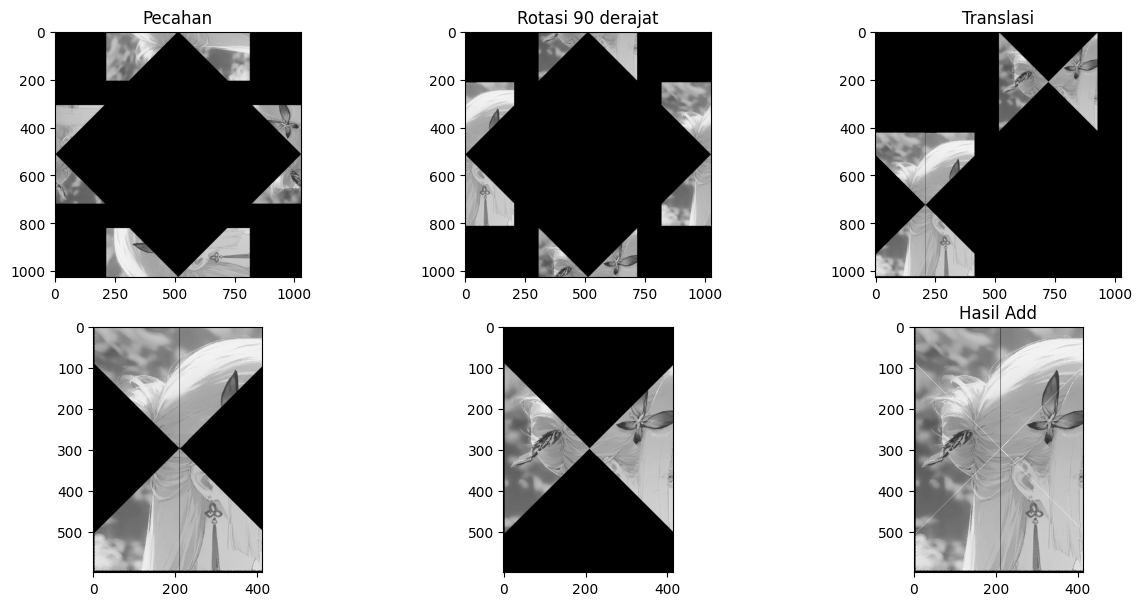

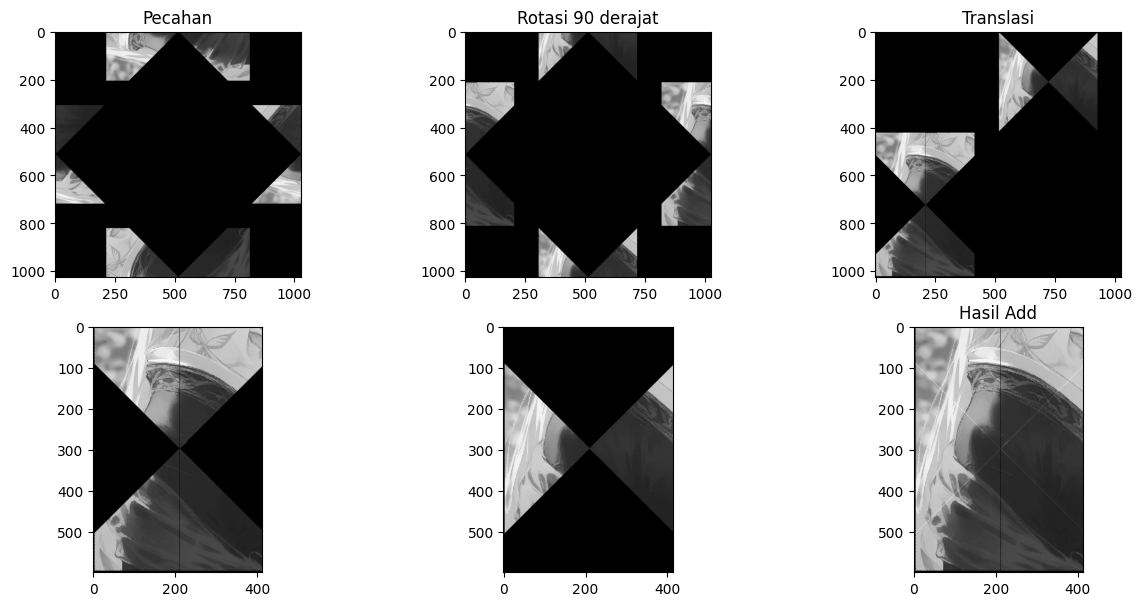

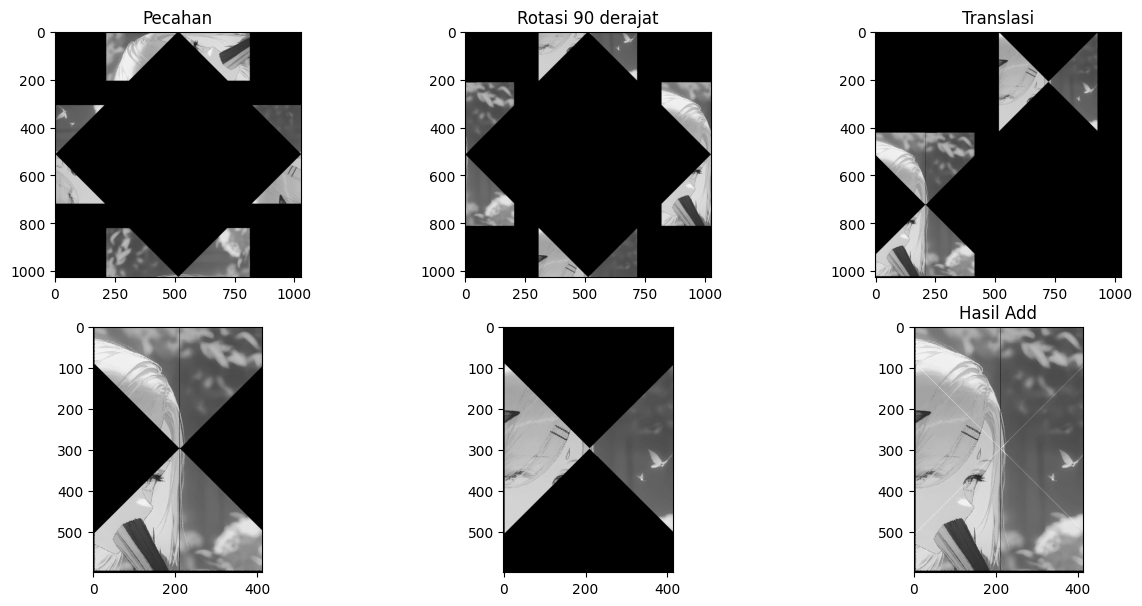

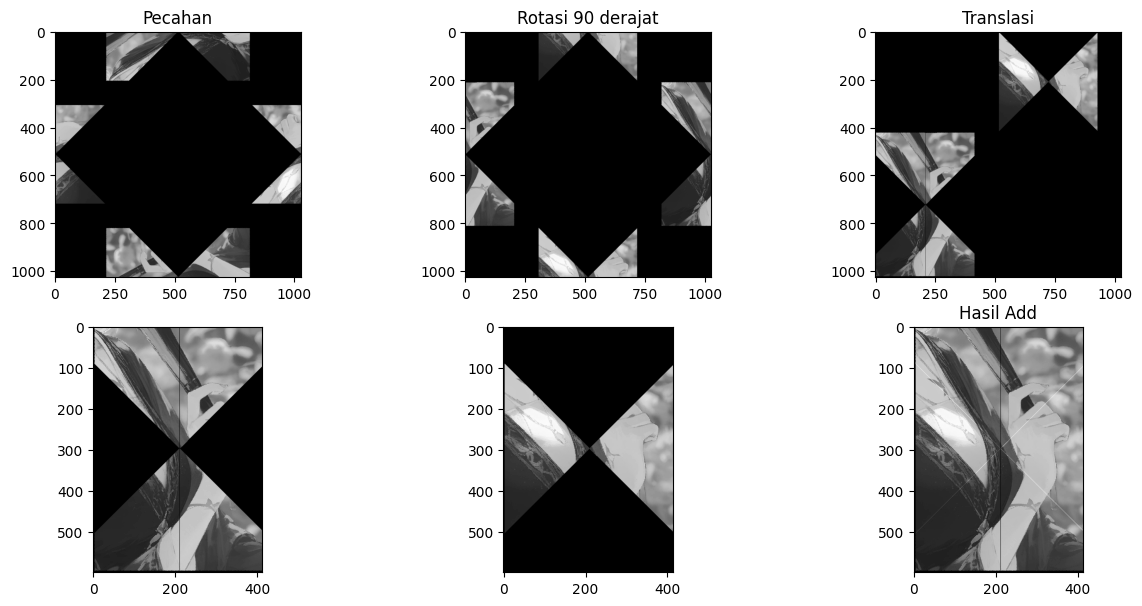

In [91]:
count = 1
for i in range(len(parts)):    
    plt.figure(figsize=(15, 30))

    plt.subplot(8, 3, count)
    plt.title('Pecahan')
    plt.imshow(parts[i], cmap='gray')
    count+=1

    plt.subplot(8, 3, count)
    plt.title('Rotasi 90 derajat')
    hasil_rotate = rotation(parts[i], 90)
    plt.imshow(hasil_rotate, cmap='gray')
    count+=1

    plt.subplot(8, 3, count)
    plt.title('Translasi')
    hasil_trans = translation(hasil_rotate, 210, 210)
    plt.imshow(hasil_trans, cmap='gray')
    count+=1

    plt.subplot(8, 3, count)
    KiriKanan = hasil_trans[426:1026, 0:413]
    plt.imshow(KiriKanan, cmap='gray')
    count+=1

    plt.subplot(8, 3, count)
    AtasBawah = translation(hasil_trans[0:600, 513:926], 87, 0)
    plt.imshow(AtasBawah, cmap='gray')
    count+=1

    plt.subplot(8, 3, count)
    plt.title('Hasil Add')
    hasilAdd = cv2.add(KiriKanan.astype(np.uint8), AtasBawah.astype(np.uint8))
    plt.imshow(hasilAdd, cmap='gray')
    mergeComp.append(hasilAdd)
    count+=1

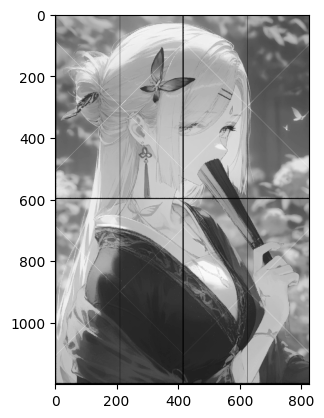

In [92]:
def mergeHorizontal(images):
    merged_height = images[0].shape[0]
    merged_width = sum(image.shape[1] for image in images)
    merged_image = np.zeros((merged_height, merged_width))
    
    currentCols = 0
    for image in images:
        merged_image[:, currentCols:currentCols+image.shape[1]] = image
        currentCols += image.shape[1]
        
    return merged_image

def mergeVertikal(images):
    merged_width = images[0].shape[1]
    merged_height = sum(image.shape[0] for image in images)
    merged_image = np.zeros((merged_height, merged_width))
    
    currentRows = 0
    for image in images:
        merged_image[currentRows:currentRows+image.shape[0], :] = image
        currentRows += image.shape[0]
    
    return merged_image

row1 = mergeHorizontal([mergeComp[0], mergeComp[2]])
row2 = mergeHorizontal([mergeComp[1], mergeComp[3]])
merged_pic = mergeVertikal([row1, row2])

# merged_pic.astype(int)
plt.imshow(merged_pic, cmap='gray')

Text(0.5, 1.0, 'Histogram Hasil Ekualisasi')

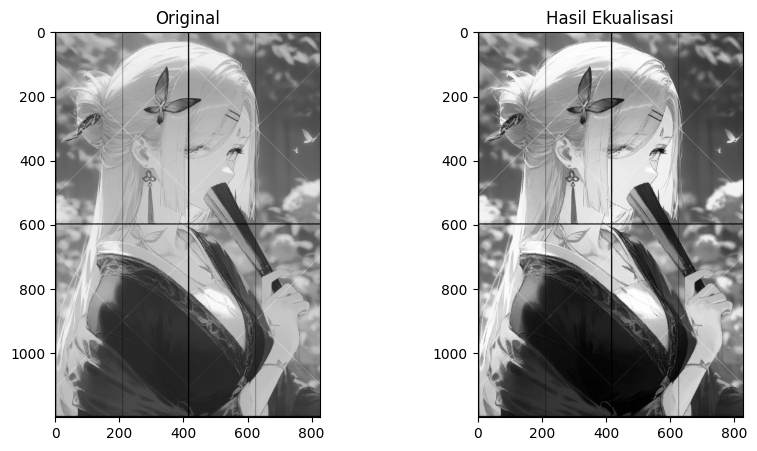

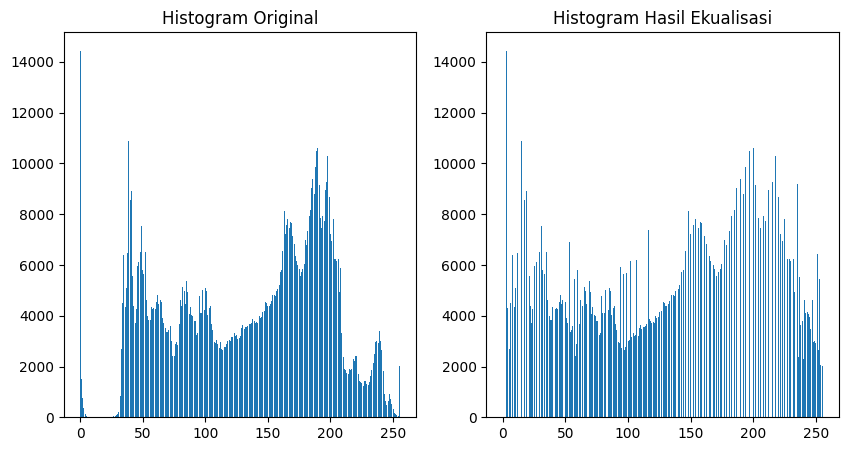

In [93]:
def equalization(image):
    hist = np.zeros(256, dtype=int)
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            pixel_value = int(image[i, j])
            hist[pixel_value] += 1
    
    cdf = np.zeros(256, dtype=int)
    for i in range(256):
        cdf[i] = np.sum(hist[0:i+1])
    
    totalPixels = height*width
    targetValues = (cdf*(256-1)) / totalPixels
    targetValues = np.floor(targetValues).astype(int)

    hasil = np.zeros(image.shape)
    for i in range(height):
        for j in range(width):
            hasil[i, j] = targetValues[int(image[i, j])]
    
    return hasil

def histogram(image, lv):
    grayValue = [i for i in range(lv)] 
    sumGray = np.zeros(lv, dtype=int)
    height, width = image.shape    
    for i in range(height): 
        for j in range(width): 
            sumGray[int(image[i,j])] += 1  
    plt.bar(grayValue, sumGray)

imageEqu = equalization(merged_pic)

plt.figure(figsize=(10,5)) 
plt.subplot(1, 2, 1)
plt.imshow(merged_pic, cmap='gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(imageEqu, cmap='gray')
plt.title('Hasil Ekualisasi')

plt.figure(figsize=(10,5)) 
plt.subplot(121)
histogram(merged_pic,256)
plt.title('Histogram Original')
plt.subplot(122)
histogram(imageEqu,256)
plt.title('Histogram Hasil Ekualisasi')

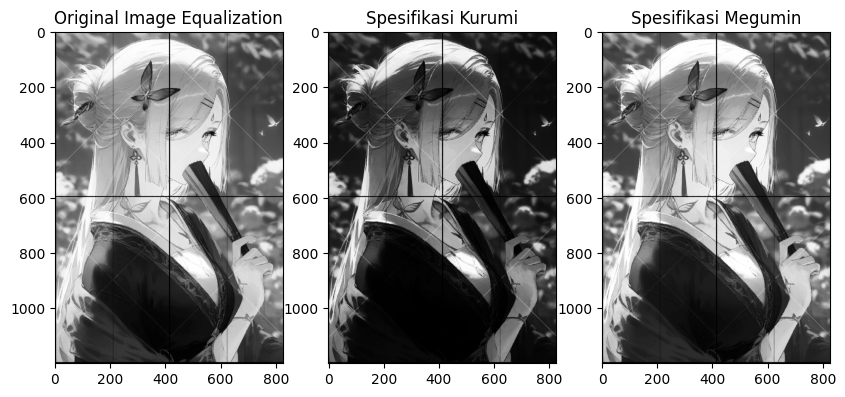

In [94]:
def spec_hist(source_image, target_image):
    # Menghitung histogram citra sumber
    hist_source = np.zeros(256, dtype=int)
    height_source, width_source = source_image.shape
    for i in range(height_source):
        for j in range(width_source):
            pixel_value_source = int(source_image[i, j])  # Konversi ke integer
            hist_source[pixel_value_source] += 1
    
    # Menghitung histogram citra target
    hist_target = np.zeros(256, dtype=int)
    height_target, width_target = target_image.shape
    for i in range(height_target):
        for j in range(width_target):
            pixel_value_target = int(target_image[i, j])  # Konversi ke integer
            hist_target[pixel_value_target] += 1
    
    # Menghitung cumulative distribution function (CDF) dari histogram citra target
    cdf_target = np.cumsum(hist_target)
    
    # Mencari pemetaan dari citra sumber ke citra target
    mapping = np.zeros(256, dtype=int)
    for i in range(256):
        mapping[i] = np.argmin(np.abs(cdf_target - np.sum(hist_source[0:i+1])))
    
    # Membuat citra hasil yang telah disesuaikan histogramnya
    result_image = np.zeros(source_image.shape)
    for i in range(height_source):
        for j in range(width_source):
            result_image[i, j] = mapping[int(source_image[i, j])]
    
    return result_image

# Load dua citra referensi
ref_img1 = plt.imread('res/kurumi.jpg')
target1_gray = cv2.cvtColor(ref_img1, cv2.COLOR_RGB2GRAY)
ref_img2 = plt.imread('res/megumin.jpg')
target2_gray = cv2.cvtColor(ref_img2, cv2.COLOR_RGB2GRAY)

# Spesifikasi citra terhadap citra referensi pertama
output_img1 = spec_hist(imageEqu, target1_gray)

# Spesifikasi citra terhadap citra referensi kedua
output_img2 = spec_hist(imageEqu, target2_gray)

# Menampilkan citra asli, citra hasil spesifikasi terhadap ref1, dan ref2
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(imageEqu, cmap='gray')
plt.title('Original Image Equalization')

plt.subplot(1, 3, 2)
plt.imshow(output_img1, cmap='gray')
plt.title('Spesifikasi Kurumi')

plt.subplot(1, 3, 3)
plt.imshow(output_img2, cmap='gray')
plt.title('Spesifikasi Megumin')

plt.show()

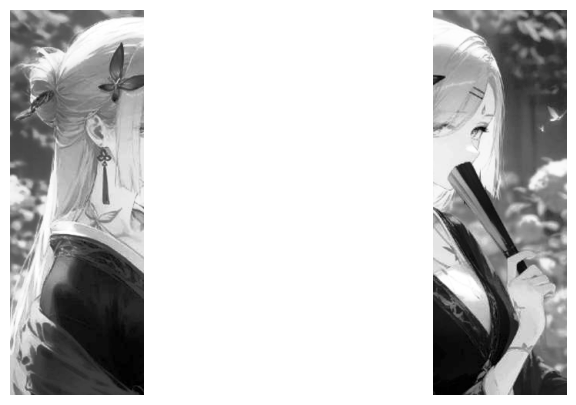

<Figure size 1000x500 with 0 Axes>

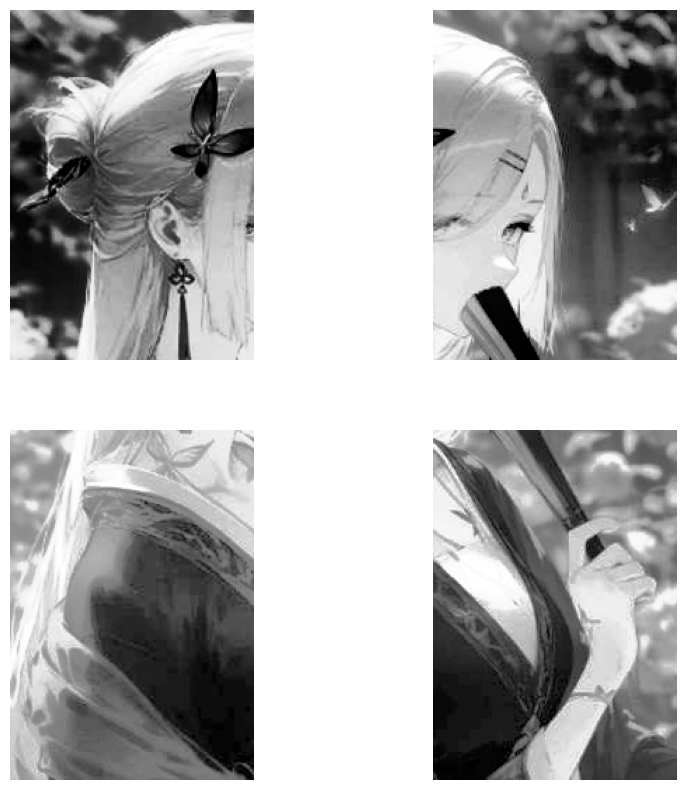

<Figure size 1000x500 with 0 Axes>

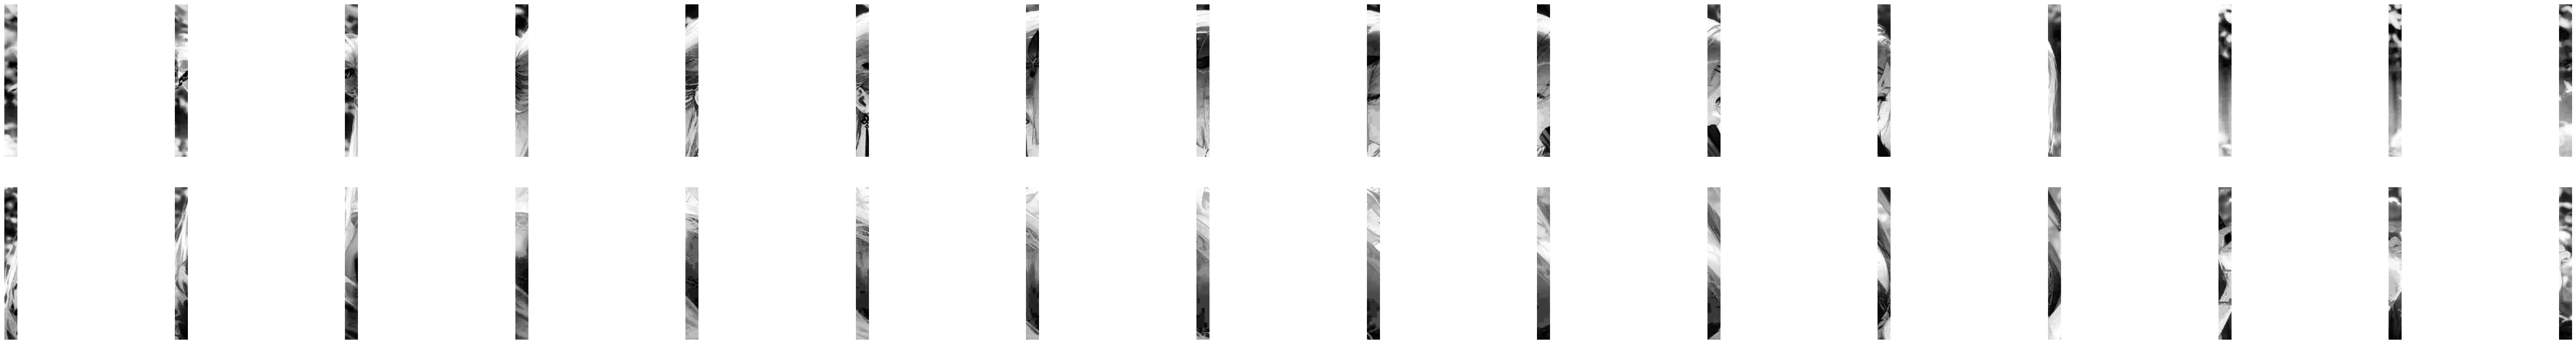

<Figure size 1000x500 with 0 Axes>

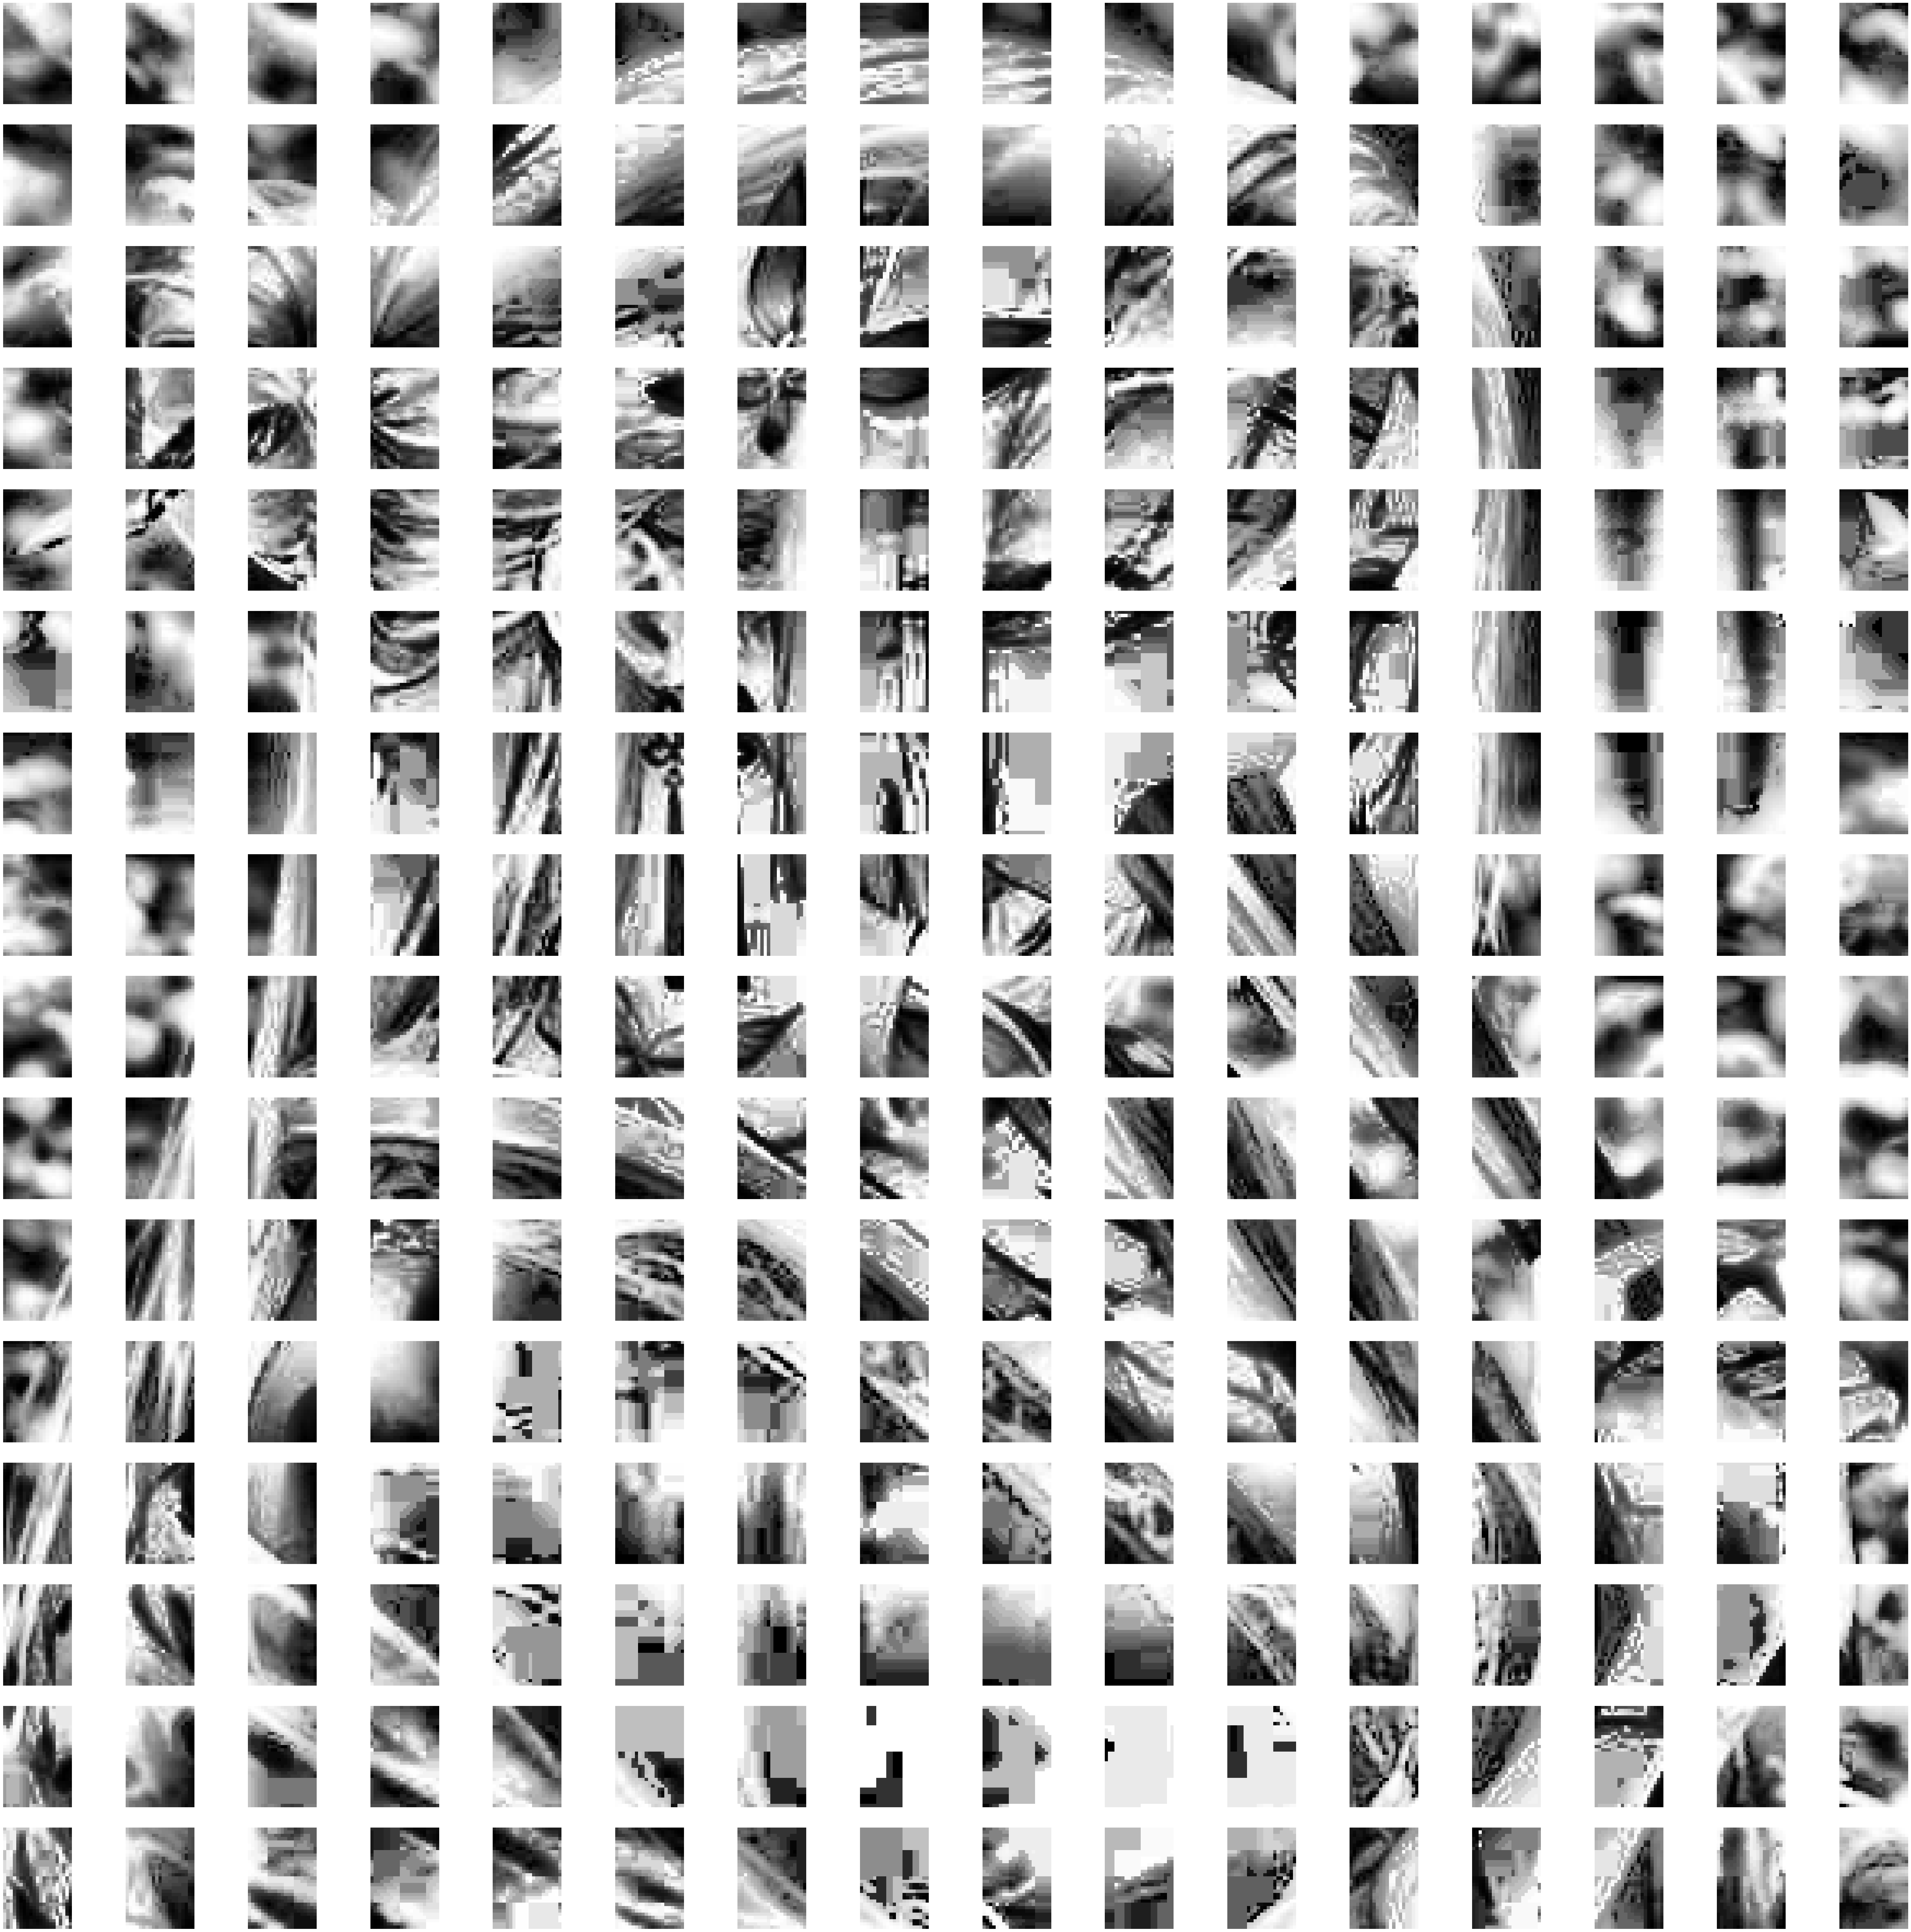

<Figure size 1000x500 with 0 Axes>

In [95]:
# Fungsi untuk membagi gambar menjadi bagian-bagian dan melakukan spesifikasi histogram
def split_and_specify(img, target1, target2, rows, cols):
    # Mendapatkan tinggi dan lebar dari gambar
    h, w = img.shape
    # Menghitung tinggi dan lebar setiap bagian yang akan dipotong
    h_step, w_step = h // rows, w // cols
    # Inisialisasi list untuk menyimpan hasil gambar yang telah diproses
    result_images = []
    # Melakukan iterasi untuk setiap baris dan kolom dari bagian gambar
    for i in range(rows):
        for j in range(cols):
            # Memotong bagian gambar sesuai dengan indeks iterasi saat ini
            part = img[i*h_step:(i+1)*h_step, j*w_step:(j+1)*w_step]
            # Menentukan gambar target untuk spesifikasi histogram berdasarkan rata-rata intensitas piksel
            if np.mean(part) <= 128:  # Jika rata-rata intensitas piksel kurang dari atau sama dengan 128
                target = target1  # Gunakan gambar target1 (kurumi.jpg)
            else:
                target = target2  # Jika tidak, gunakan gambar target2 (megumin.jpg)
            # Melakukan equalisasi histogram pada bagian gambar yang dipotong
            matched = cv2.equalizeHist(part)
            # Menambahkan gambar yang telah diproses ke dalam list hasil
            result_images.append(matched)
    # Mengembalikan list dari gambar hasil proses
    return result_images

# Membaca gambar 'senhe.jpg' dalam mode grayscale
img = cv2.imread('senhe.jpg', 0)
# Membaca gambar target 'kurumi.jpg' dalam mode grayscale
target1 = cv2.imread('res/kurumi.jpg', 0)
# Membaca gambar target 'megumin.jpg' dalam mode grayscale
target2 = cv2.imread('res\megumin.jpg', 0)

# Mendefinisikan kombinasi pemotongan gambar
combinations = [(1, 2), (2, 2), (2, 16), (16, 16)]
# Melakukan iterasi untuk setiap kombinasi pemotongan gambar
for rows, cols in combinations:
    # Memanggil fungsi split_and_specify untuk setiap kombinasi
    result_images = split_and_specify(img, target1, target2, rows, cols)
    # Mempersiapkan subplot untuk menampilkan hasil gambar
    fig, axs = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    # Melakukan iterasi untuk setiap gambar hasil dan menampilkannya
    for i, ax in enumerate(axs.flatten()):
        ax.imshow(result_images[i], cmap='gray')  # Menampilkan gambar dalam skala abu-abu
        ax.axis('off')  # Menghilangkan sumbu x dan y
    
    plt.figure(figsize=(10, 5))
    plt.show()  # Menampilkan plot